## Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [49]:
#load the data
df = pd.read_csv("Churn_Modelling.csv")

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
#Dropping Irrelevant Columns from the DataFrame
df.drop(["CustomerId","Surname","RowNumber"],axis=1,inplace=True)

In [52]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.duplicated().sum()

np.int64(0)

## Visualizing Age Distribution with a Histogram

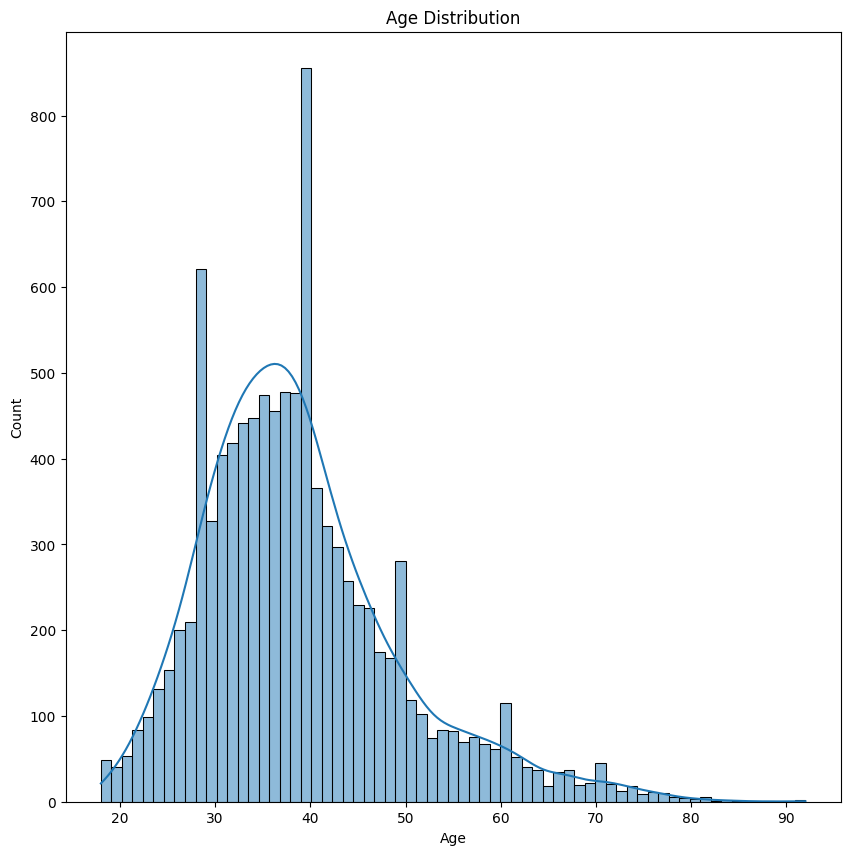

In [8]:
plt.figure(figsize=(10,10))
sns.histplot(data=df,x='Age',kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

## Visualizing Gender Distribution of Customers

C:\Users\ASHAD\AppData\Local\Temp\ipykernel_9040\3069169281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)


Text(0, 0.5, 'Count')

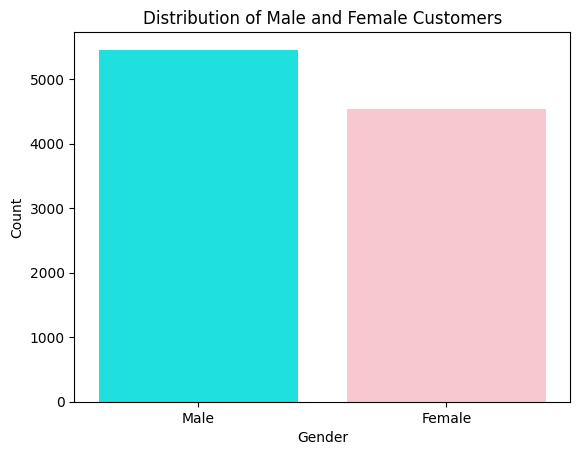

In [10]:
gender_counts = df['Gender'].value_counts()
colors = ['cyan', 'pink']  
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)
plt.title('Distribution of Male and Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count')

In [53]:
#Encoding Gender Feature: Female = 1, Male = 0
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})

In [54]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


## Encoding Geography Feature and Dropping Original Column

In [55]:
new_geo=LabelEncoder()
df["geo"]=new_geo.fit_transform(df['Geography'])
df.drop('Geography',axis=1,inplace=True)

In [56]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,geo
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,2
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,2


## Calculating and Adding a New Feature for Balance-to-Salary Ratio

In [57]:
df["Balance_salary_ratio"] = df["Balance"]/df["EstimatedSalary"]
df.drop(["Balance","EstimatedSalary"],axis=1,inplace=True)

In [58]:
df.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,geo,Balance_salary_ratio
0,619,1,42,2,1,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,0,2,0.744677
2,502,1,42,8,3,1,0,1,0,1.401375
3,699,1,39,1,2,0,0,0,0,0.000000
4,850,1,43,2,1,1,1,0,2,1.587055


In [24]:
X=df.drop('Exited',axis=1)
y=df['Exited']
X

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,geo,Balance_salary_ratio
0,619,1,42,2,1,1,1,0,0.000000
1,608,1,41,1,1,0,1,2,0.744677
2,502,1,42,8,3,1,0,0,1.401375
3,699,1,39,1,2,0,0,0,0.000000
4,850,1,43,2,1,1,1,2,1.587055
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,2,1,0,0,0.000000
9996,516,0,35,10,1,1,1,0,0.564108
9997,709,1,36,7,1,0,1,0,0.000000
9998,772,0,42,3,2,1,0,1,0.808230


### Splitting Data into Training and Testing Sets

In [40]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Model Selection

In [42]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

## Model Evaluation

In [59]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8656
[[1933   70]
 [ 266  231]]


Text(45.722222222222214, 0.5, 'Truth')

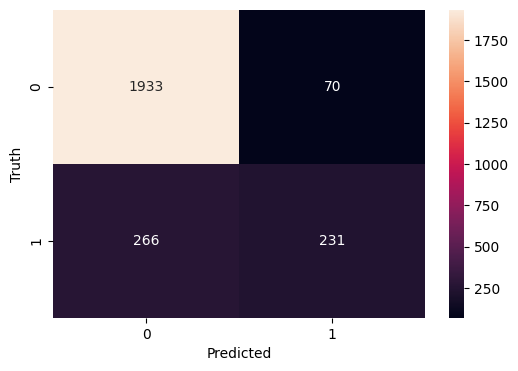

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Classification Report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.46      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500

